# Data review

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../input/mts-library/items.csv')

In [3]:
df.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       59599 non-null  int64 
 1   title    59599 non-null  object
 2   genres   59568 non-null  object
 3   authors  52714 non-null  object
 4   year     46720 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [5]:
df.describe()

,id
count,59599.000000
mean,160665.157402
std,92726.533331
min,1.000000
25%,80603.500000
50%,160596.000000
75%,240783.500000
max,321751.000000


# Data preprocessing

In [6]:
# Remove years such as B.C. or interval
df['year'] = df['year'].apply(lambda x: np.nan if type(x) in [np.nan, float] else (np.nan if len(x) != 4 else x))

In [7]:
df.head(10)

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873
5,250772,Исповедь,"Стихи и поэзия,Литература 19 века",Михаил Лермонтов,NaN
6,135463,Самоотверженный заяц,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1883
7,221944,Праздный разговор,"Сказки,Литература 19 века,Русская классика",Михаил Салтыков-Щедрин,1886
8,307,Путём-дорогою,"Зарубежные детские книги,Сказки,Русская классика",Михаил Салтыков-Щедрин,NaN
9,133138,Соседи,"Зарубежные детские книги,Сказки,Русская классика",Михаил Салтыков-Щедрин,NaN


In [8]:
df.isna().sum()

id             0
title          0
genres        31
authors     6885
year       13768
dtype: int64

In [9]:
# Since there are 59.5K data I decided to delete the empty data. 
# And if you restore this data will be difficult to guess what year the work, 
# and the work without the year of issue 13.7K
df = df.dropna()
df.reset_index(drop=True)

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873
...,...,...,...,...,...
39543,291254,Редкий цветок,"Героическое фэнтези,Любовное фэнтези",Юлия Шолох,2019
39544,137972,Игра Реальностей. Эра и Кайд. Книга 1,Любовно-фантастические романы,Вероника Мелан,2019
39545,295887,Вещая птица (по)беды,"Попаданцы,Любовное фэнтези,Юмористическое фэнтези",Татьяна Коростышевская,2019
39546,132718,Моя судьба под твоими ногами,"Эротическое фэнтези,Любовное фэнтези",Тальяна Орлова,2019


In [10]:
df.head(10)

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873
6,135463,Самоотверженный заяц,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1883
7,221944,Праздный разговор,"Сказки,Литература 19 века,Русская классика",Михаил Салтыков-Щедрин,1886
10,202356,Орел-меценат,"Сказки,Литература 19 века,Русская классика",Михаил Салтыков-Щедрин,1884
11,51310,Либерал,"Зарубежная классика,Литература 19 века,Русская...",Михаил Салтыков-Щедрин,1885
12,75579,Ярмарка тщеславия,"Зарубежная классика,Зарубежная старинная литер...",Уильям Теккерей,1848


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39548 entries, 0 to 59591
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       39548 non-null  int64 
 1   title    39548 non-null  object
 2   genres   39548 non-null  object
 3   authors  39548 non-null  object
 4   year     39548 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [12]:
# fix types
df['year'] = df['year'].apply(lambda x: int(x))

# Data visualization

In [13]:
fourteenth_century = df[(df['year'] >= 1300) & (df['year'] <= 1399)]
fifteenth_century = df[(df['year'] >= 1400) & (df['year'] <= 1499)]
sixteenth_century = df[(df['year'] >= 1500) & (df['year'] <= 1599)]
seventeenth_century = df[(df['year'] >= 1600) & (df['year'] <= 1699)]
eighteenth_century = df[(df['year'] >= 1700) & (df['year'] <= 1799)]
nineteenth_century = df[(df['year'] >= 1800) & (df['year'] <= 1899)]
twentieth_century = df[(df['year'] >= 1900) & (df['year'] <= 1999)]
twenty_first_century = df[(df['year'] >= 2000) & (df['year'] <= 2099)]

a = [
    fourteenth_century, fifteenth_century, sixteenth_century, seventeenth_century,
    eighteenth_century, nineteenth_century, twentieth_century, twenty_first_century
]

print(f'Fourteenth century:\n{a[0].count()}')
print(f'\nFifteenth century:\n{a[1].count()}')
print(f'\nSixteenth century:\n{a[2].count()}')
print(f'\nSeventeenth century:\n{a[3].count()}')
print(f'\nEighteenth century:\n{a[4].count()}')
print(f'\nNineteenth century:\n{a[5].count()}')
print(f'\nTwentieth century:\n{a[6].count()}')
print(f'\nTwenty first century:\n{a[7].count()}')

Fourteenth century:
id         3
title      3
genres     3
authors    3
year       3
dtype: int64

Fifteenth century:
id         4
title      4
genres     4
authors    4
year       4
dtype: int64

Sixteenth century:
id         13
title      13
genres     13
authors    13
year       13
dtype: int64

Seventeenth century:
id         30
title      30
genres     30
authors    30
year       30
dtype: int64

Eighteenth century:
id         66
title      66
genres     66
authors    66
year       66
dtype: int64

Nineteenth century:
id         1535
title      1535
genres     1535
authors    1535
year       1535
dtype: int64

Twentieth century:
id         4364
title      4364
genres     4364
authors    4364
year       4364
dtype: int64

Twenty first century:
id         33532
title      33532
genres     33532
authors    33532
year       33532
dtype: int64


Text(0, 0.5, 'Count')

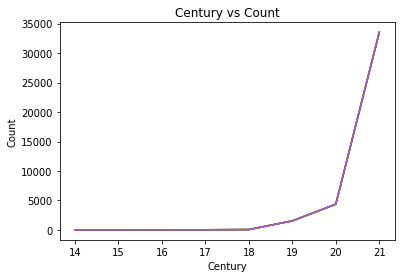

In [14]:
plt.plot(range(14,22), [x.count() for x in a])
plt.title('Сentury vs Count')
plt.xlabel('Сentury')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

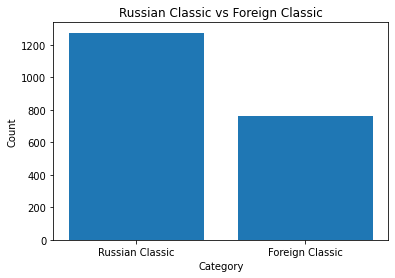

In [15]:
foreign_classic = []
russian_classic = []
df['genres'].apply(lambda x: russian_classic.append(x) if x.find('Русская классика') != -1 
                   else (foreign_classic.append(x) if x.find('Зарубежная классика') != -1 else x))

plt.bar(['Russian Classic', 'Foreign Classic'], [len(russian_classic), len(foreign_classic)])
plt.title('Russian Classic vs Foreign Classic')
plt.xlabel('Category')
plt.ylabel('Count')

215
593
1134


Text(0.5, 1.0, 'Critique vs Story vs Mysticism')

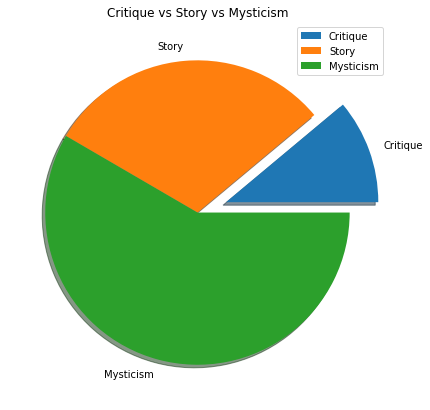

In [16]:
critique = []
story = []
mysticism = []
df['genres'].apply(lambda x: critique.append(x) if x.find('Критика') != -1 
                   else (story.append(x) if x.find('Сказки') != -1 
                         else mysticism.append(x) if x.find('Мистика') != -1 else x))

print(len(critique))
print(len(story))
print(len(mysticism))

plt.figure(figsize=[7, 7])
plt.pie([len(critique), len(story), len(mysticism)], labels=['Critique', 'Story', 'Mysticism'], explode=[0.2, 0, 0], shadow=True)
plt.legend()
plt.title('Critique vs Story vs Mysticism')

<AxesSubplot:ylabel='authors'>

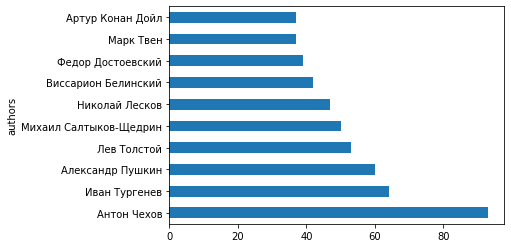

In [17]:
a = nineteenth_century.groupby(['authors'])['title'].count().sort_values(ascending=False)[:10]
a.plot.barh()